In [26]:
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.neighbors import KernelDensity
from scipy.special import logit

import sys
sys.path.insert(0, '../../..')
import kde_utils

import matplotlib.pyplot as plt

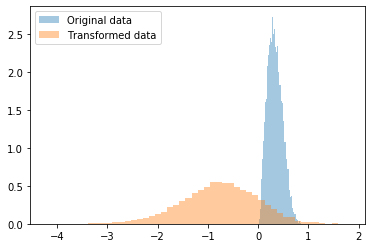

In [8]:
og_data = np.random.beta(3, 6, 10000)
data = logit(og_data)

plt.hist(
    og_data, density=True, bins=50, alpha=0.4,
    label='Original data'
)
plt.hist(
    data, density=True, bins=50, alpha=0.4,
    label='Transformed data'
)

plt.legend()
plt.show()

In [9]:
bandwidth = 0.9 \
    * min(
        data.std(),
        np.subtract(*np.percentile(data, [75, 25])) / 1.34
    ) \
    * data.size ** (-1 / 5)

model = KernelDensity(
    kernel='gaussian', bandwidth=bandwidth
).fit(data.flatten()[:, np.newaxis])

model

KernelDensity(algorithm='auto', atol=0, bandwidth=0.1064014971869464,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)

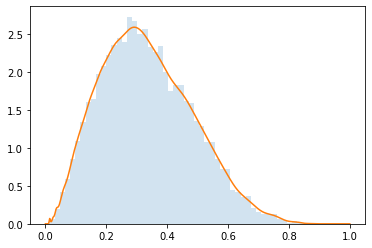

In [22]:
xs = np.linspace(0, 1, 1002)[1: -1].reshape(-1, 1)

pdfs = np.exp(model.score_samples(logit(xs))).flatten() \
    / (xs * (1 - xs)).flatten()

plt.hist(og_data, density=True, bins=50, alpha=0.2)
plt.plot(xs, pdfs)
plt.show()

In [27]:
df = pd.read_csv('../../../data/data.csv', index_col=0)
types = ['ES', 'TH', 'RRH', 'PREV']
df = df[df['Real'] != 2]
df = df.drop(labels='PSH', axis=1)

data = df[types].to_numpy().flatten()
kde = kde_utils.KDEHelper(data)

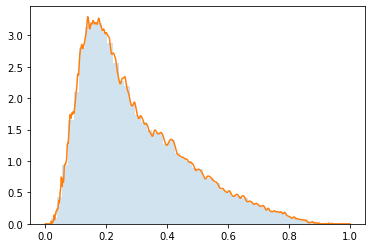

In [31]:
plt.hist(data, density=True, bins=50, alpha=0.2)

xs = np.linspace(0, 1, 1002)[1: -1].reshape(-1, 1)
plt.plot(xs, kde.get_transformed_pdf(xs))

plt.show()